<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Testing-map-creation" data-toc-modified-id="Testing-map-creation-1">Testing map creation</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1">Imports</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-1.2">Visualization</a></span></li><li><span><a href="#Initial-visualizations" data-toc-modified-id="Initial-visualizations-1.3">Initial visualizations</a></span></li><li><span><a href="#More-precise-tests" data-toc-modified-id="More-precise-tests-1.4">More precise tests</a></span></li></ul></li></ul></div>

# Testing map creation

## Imports

In [1]:
# Use this to reload changes in python scripts
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from orangutan.map import ArenaMap

%matplotlib inline

In [33]:
plt.plot()
plt.close('all')
plt.rcParams["figure.figsize"] = (24, 6)  
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.size'] = 16

## Visualization

https://github.com/beyretb/AnimalAI-Olympics/issues/77

> It is the z (forward) component of the agent's velocity in its local reference frame.

z seems to be the forward direction of the agent, x lateral and y is related to height.

So I have to take orientation of the agent into account to be able to map the agent position. A complete rotation takes 60 steps, and it does not seem to use inertia. So each time the agent rotates it does 6º turn.

In [49]:
def visualize_gameplay(filepath, plot_every_steps=20, n_plots=4):
    data = np.load(filepath)
    arena_map = ArenaMap()
    step_idx = 0
    plot_idx = 0
    for speed, previous_action in zip(data['speed'], data['previous_action']):
        arena_map.add_point(speed[0, [0, 2]], previous_action)
        step_idx += 1
        if not step_idx % plot_every_steps:
            plt.subplot(1, n_plots, plot_idx % n_plots + 1)
            arena_map.visualize_trajectory()
            plot_idx += 1
            if plot_idx == n_plots:
                plt.figure()
                plot_idx = 0
    plt.subplot(1, n_plots, plot_idx % n_plots + 1)
    arena_map.visualize_trajectory()
    print(arena_map._orientation)
    #print(arena_map._positions)

## More precise tests

270


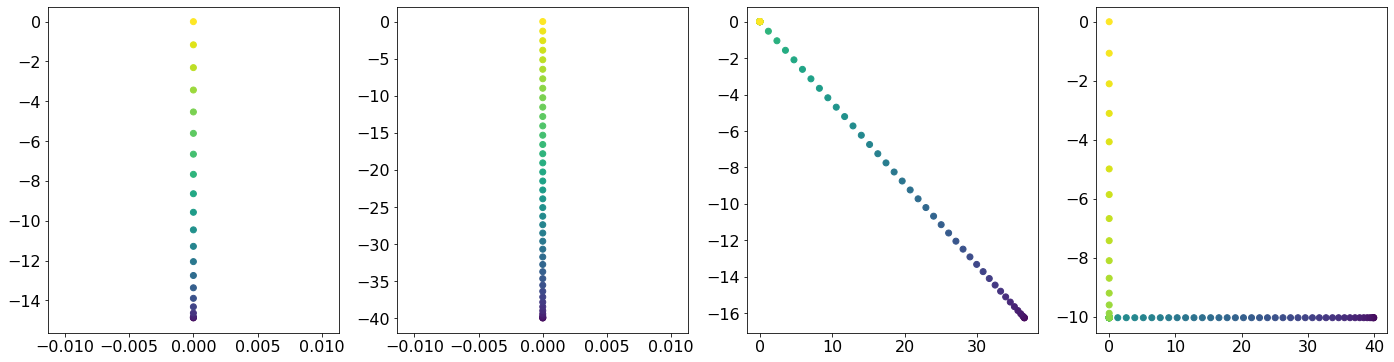

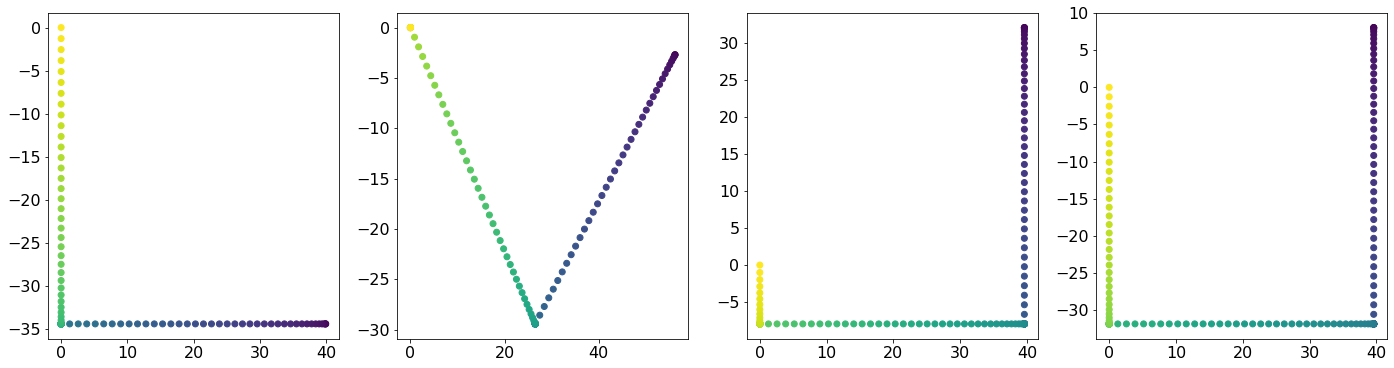

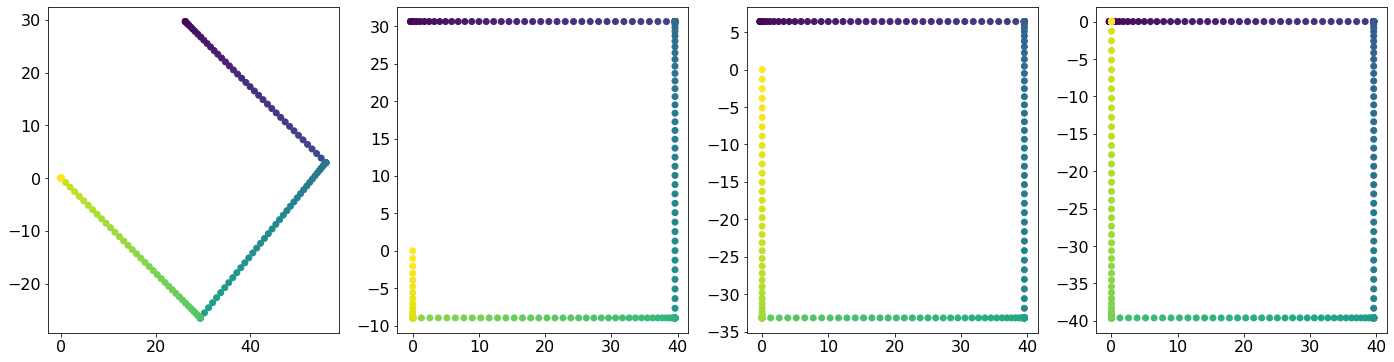

In [52]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00000.npz') # square

270


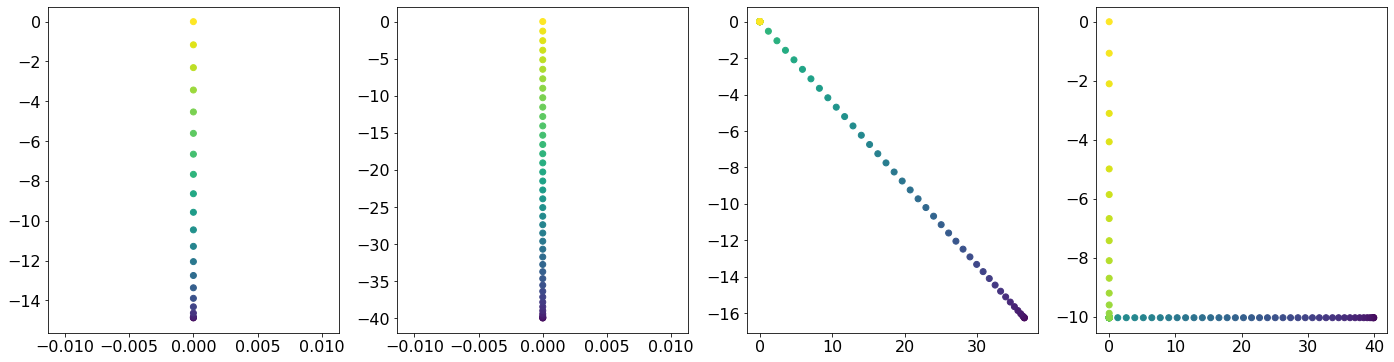

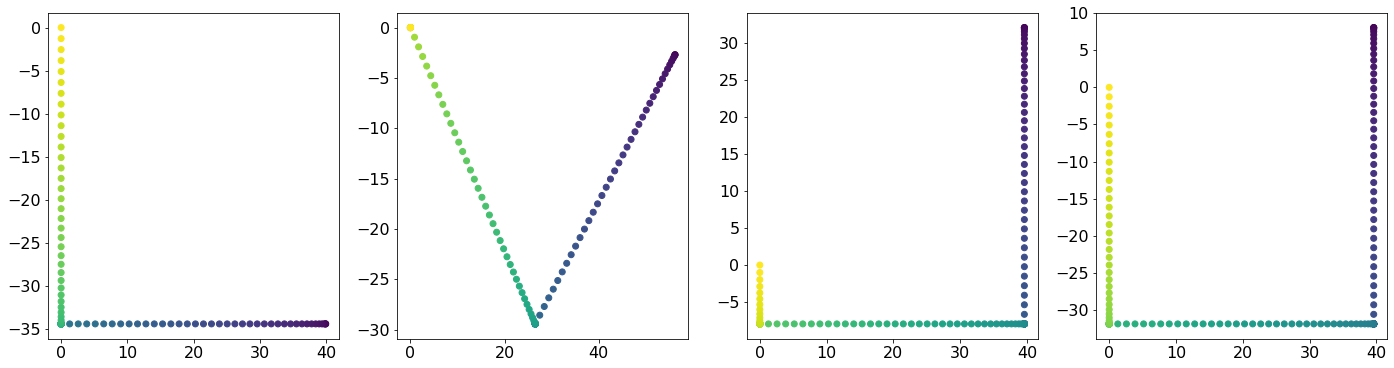

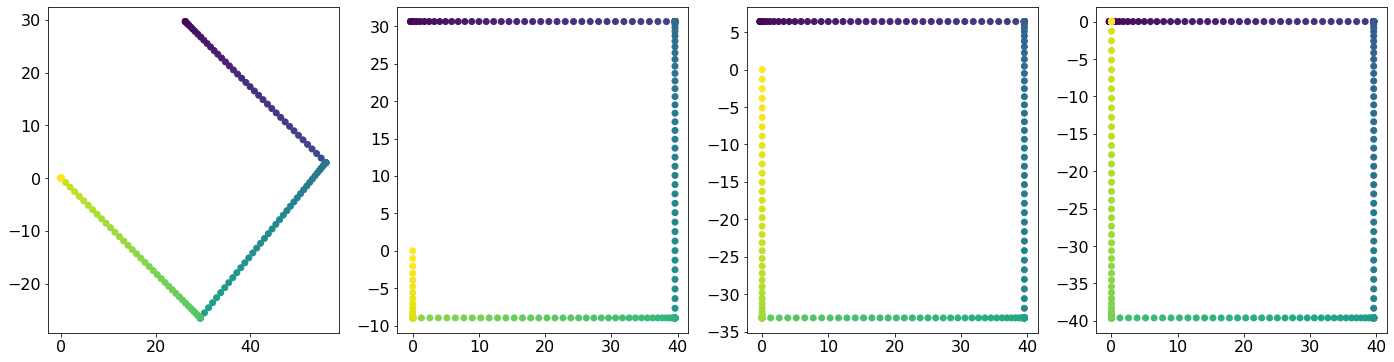

In [53]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00000.npz') # square

222


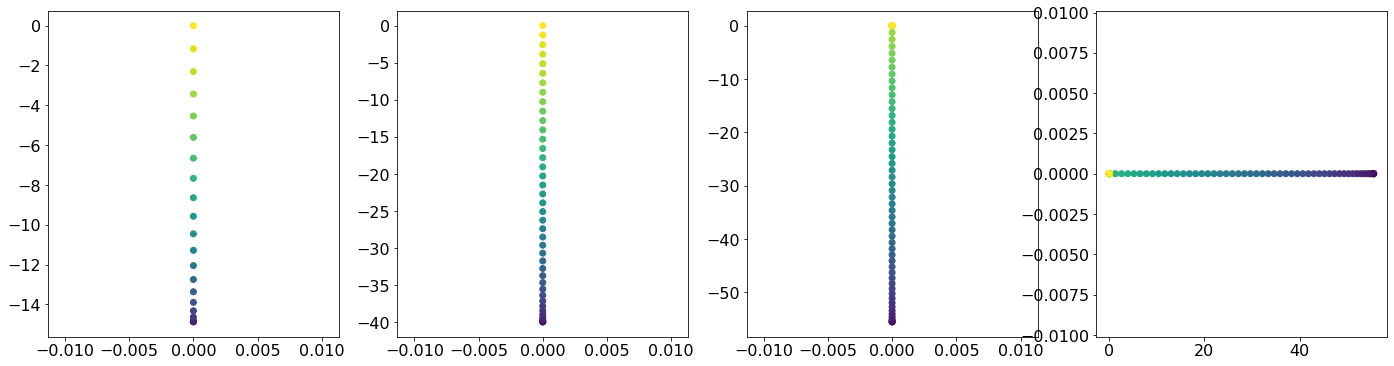

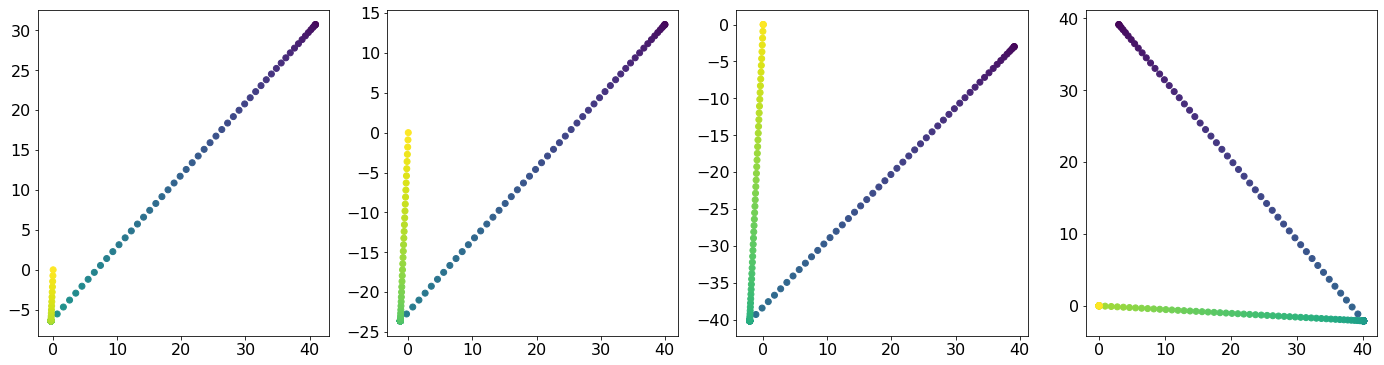

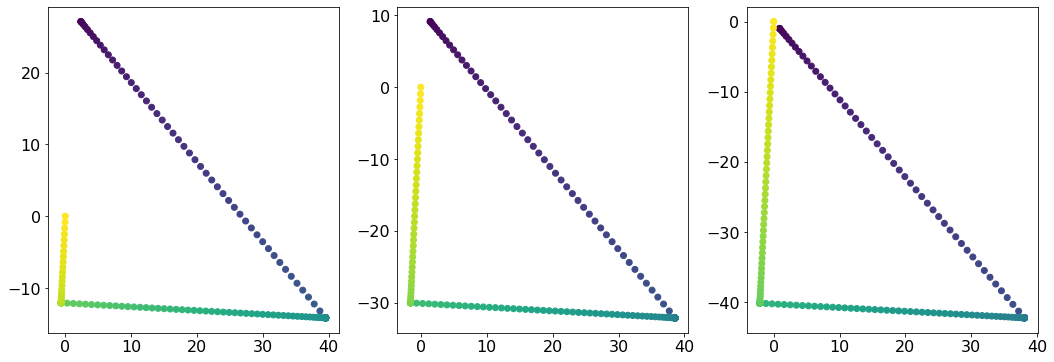

In [54]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00001.npz') # triangle starting at rotation 45

222


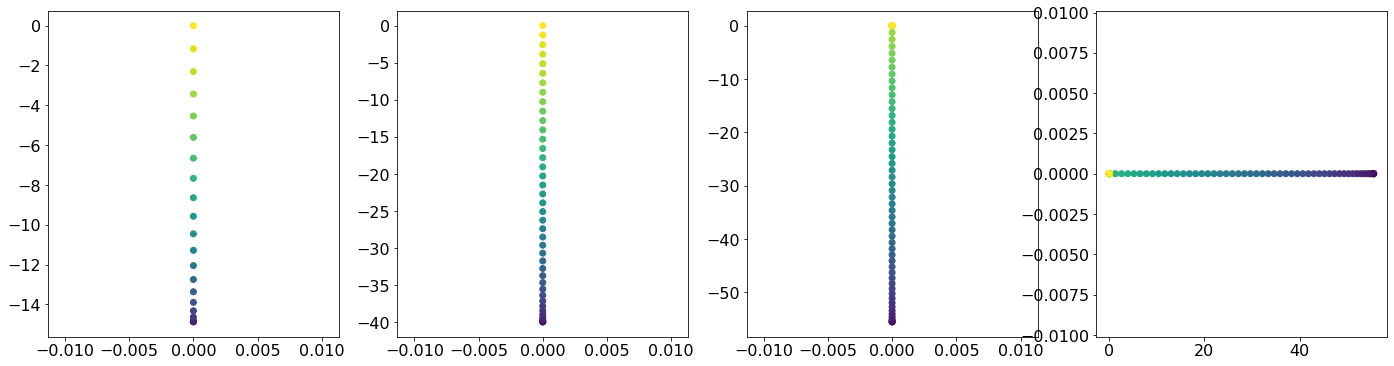

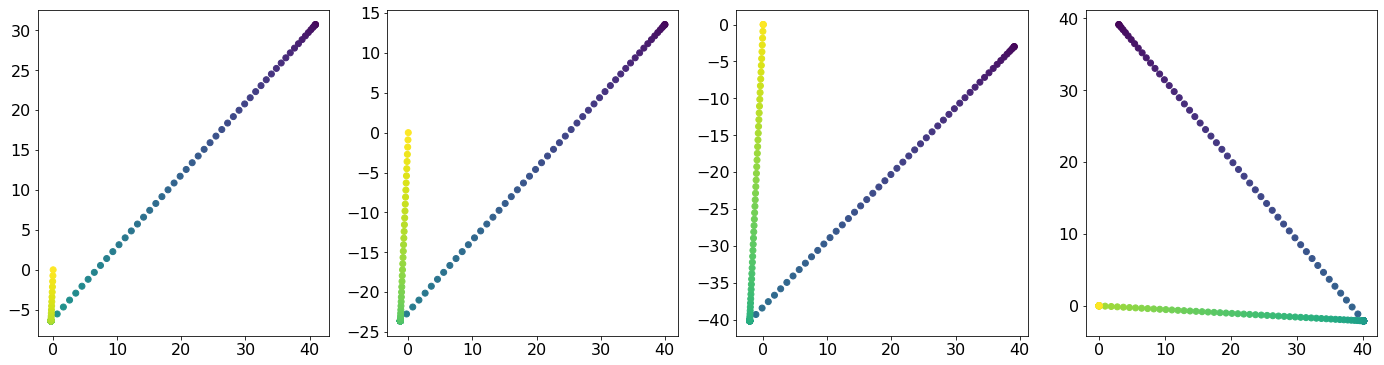

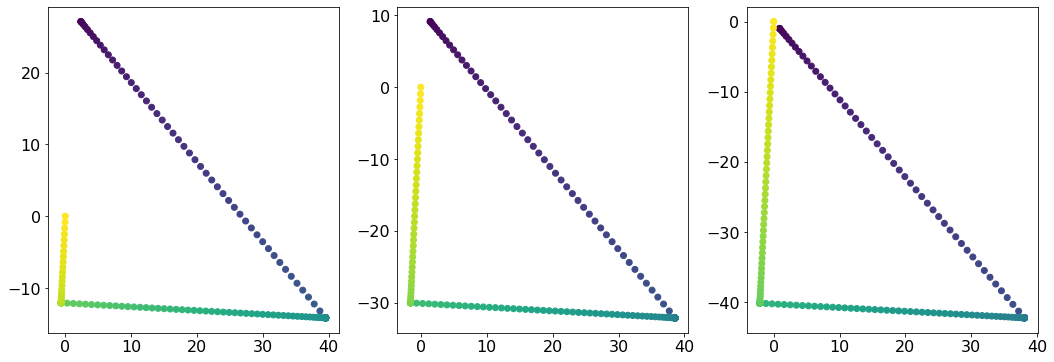

In [55]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00001.npz') # triangle starting at rotation 45

270


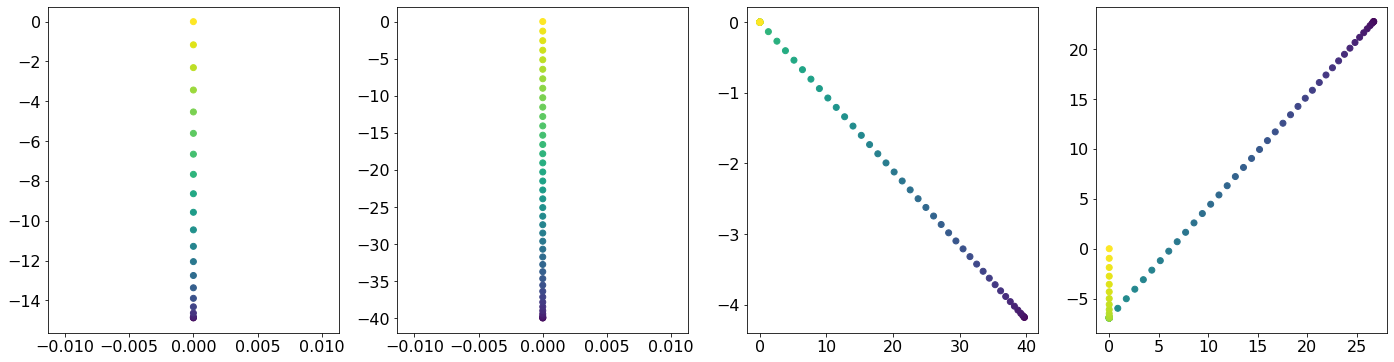

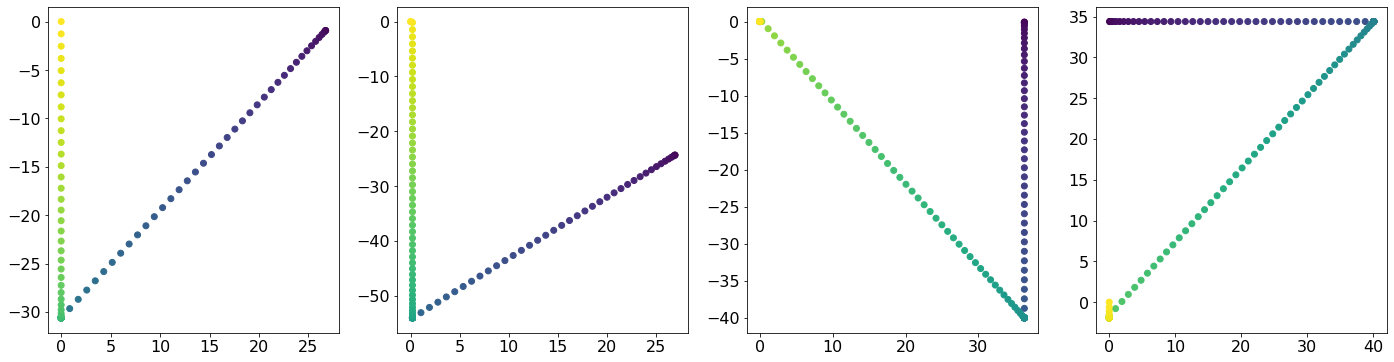

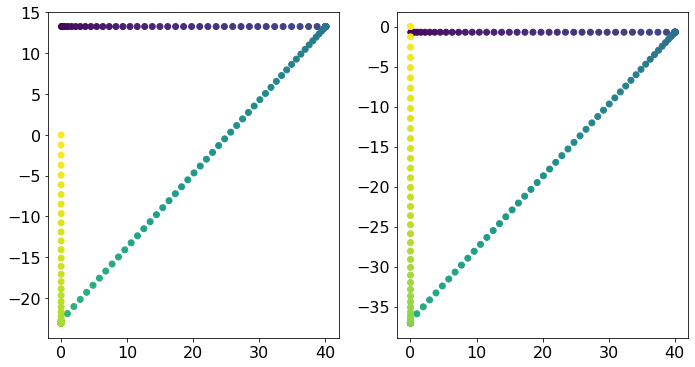

In [56]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00002.npz') # triangle starting at rotation 0

264


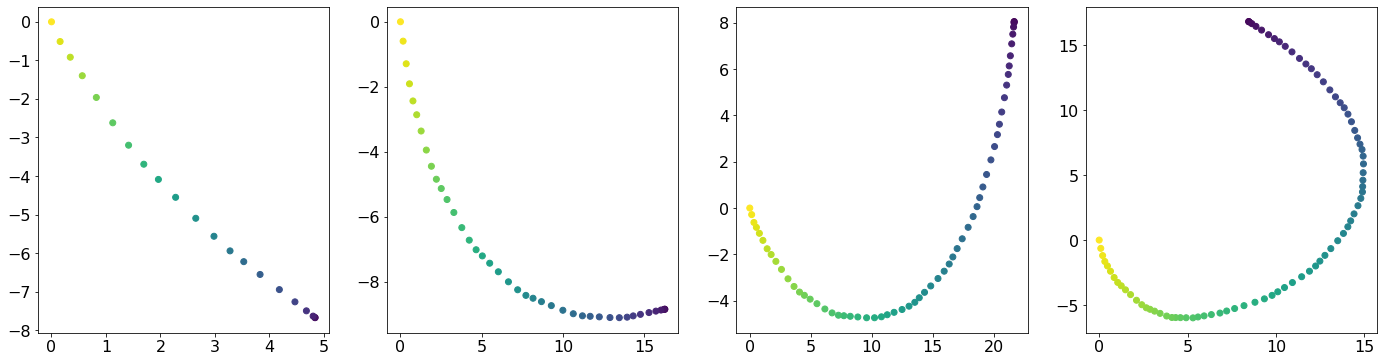

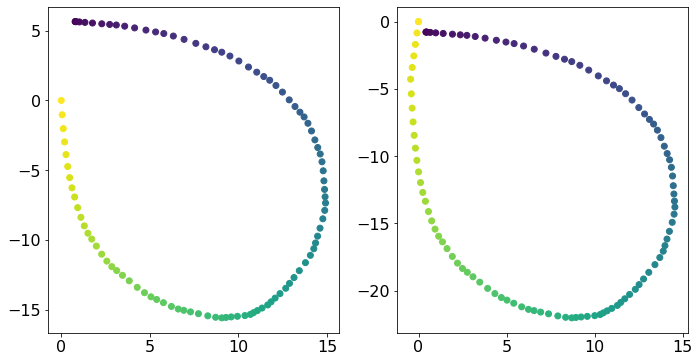

In [57]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00003.npz') # go around the arena and back to the initial point

-270


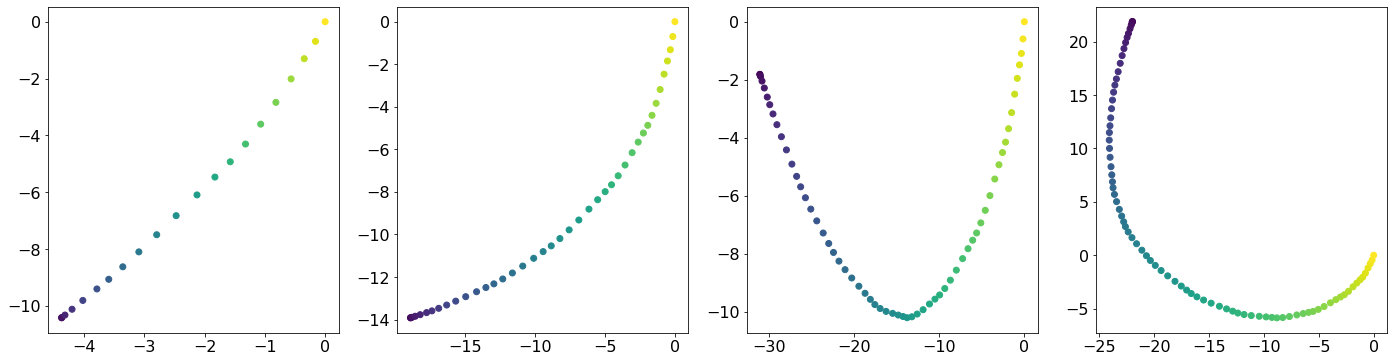

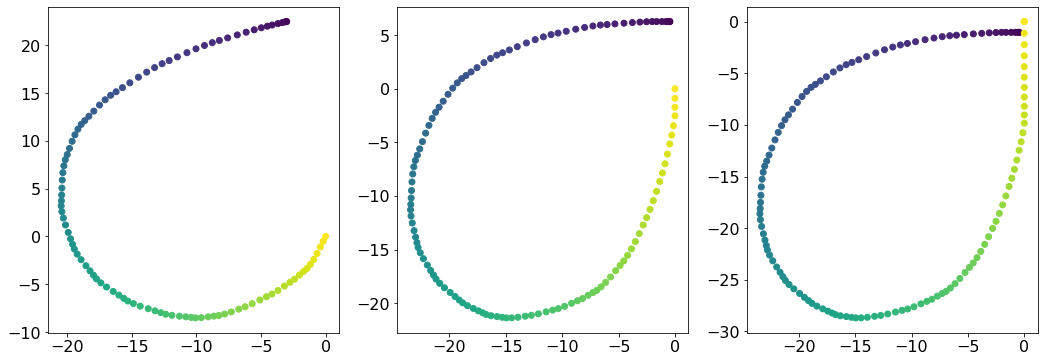

In [58]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00004.npz') # go around the arena and back to the initial point going in other direction

366


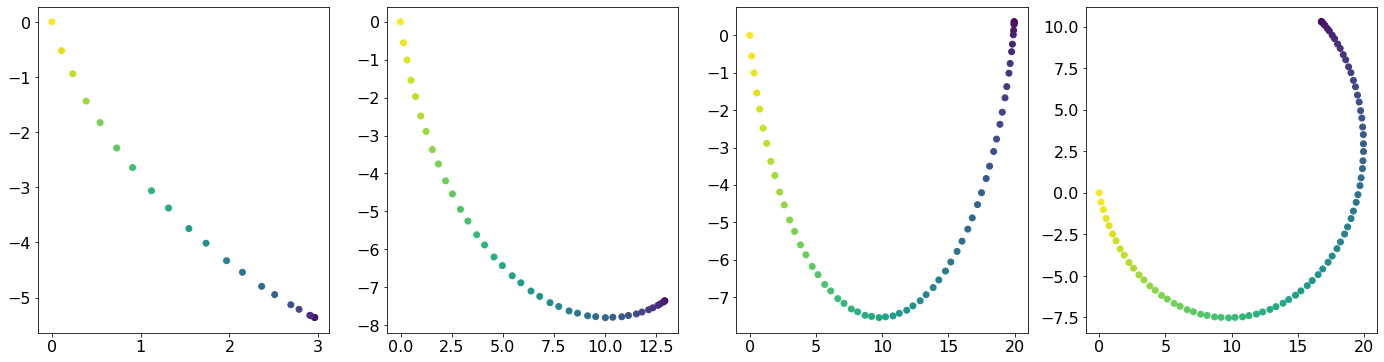

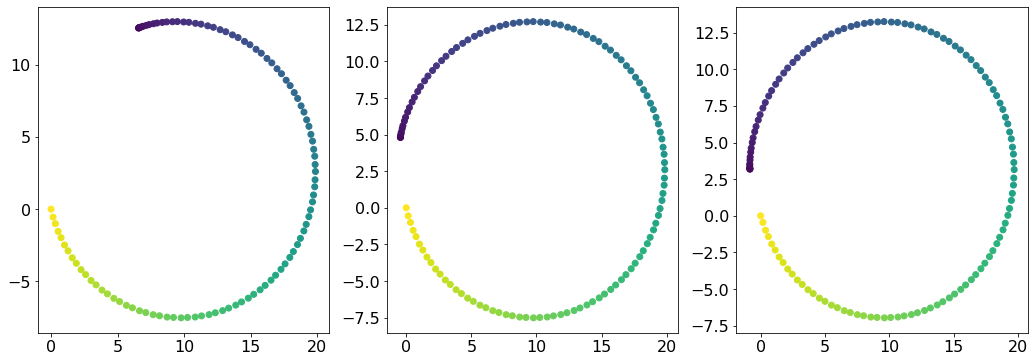

In [59]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00005.npz') # circle

174


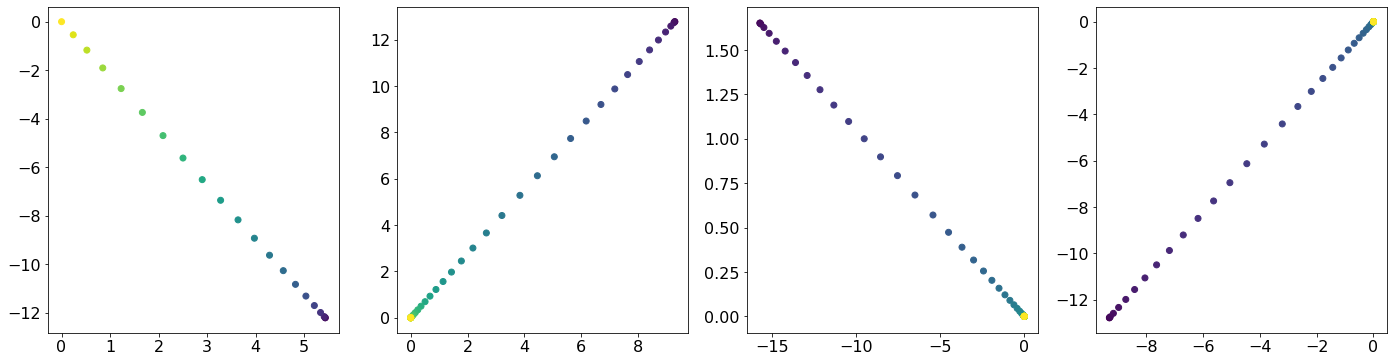

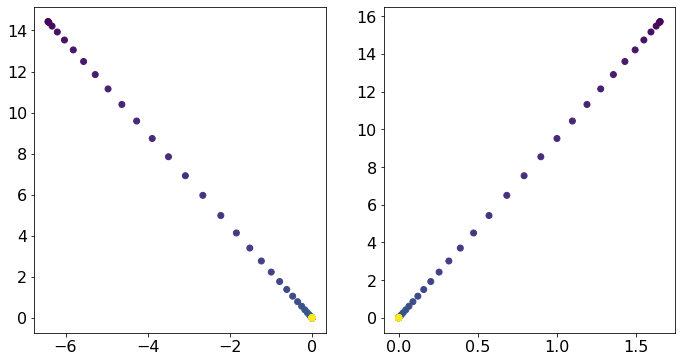

In [60]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00006.npz') # straight line, i rotate but without moving from the trajectory

354


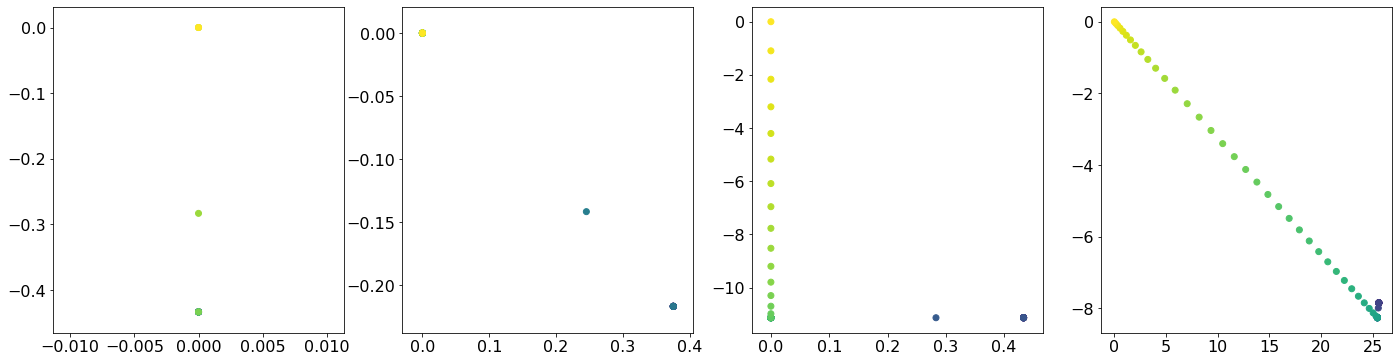

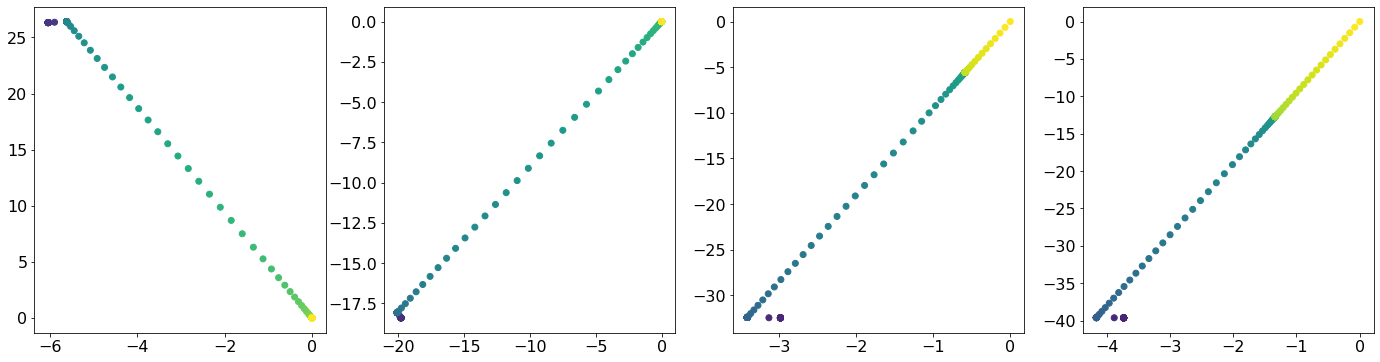

In [61]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00007.npz') # straight line, i rotate but without moving from the trajectory

-360


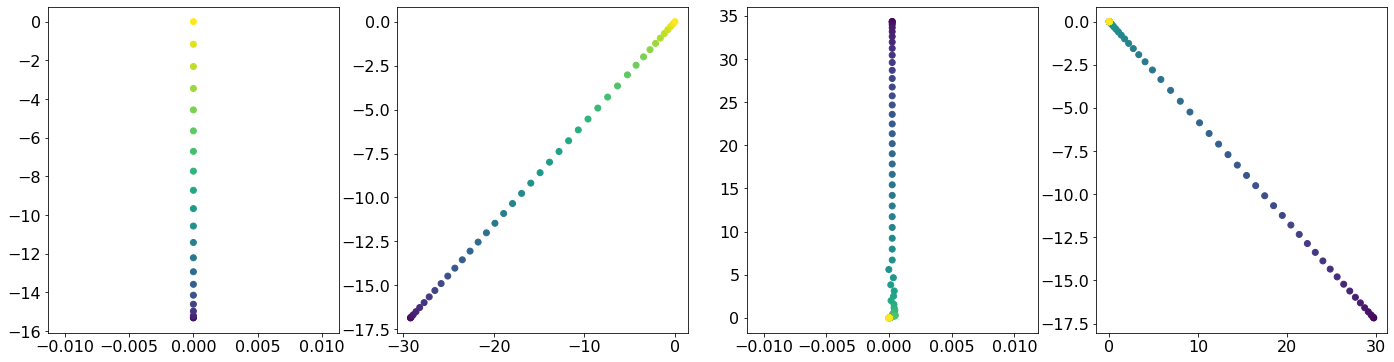

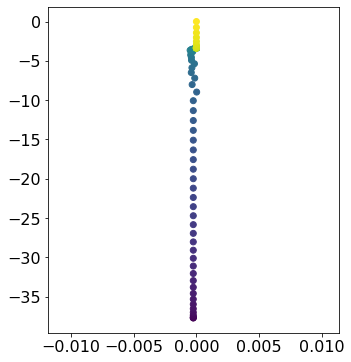

In [62]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00008.npz') # straight line, i rotate but without moving from the trajectory

-912


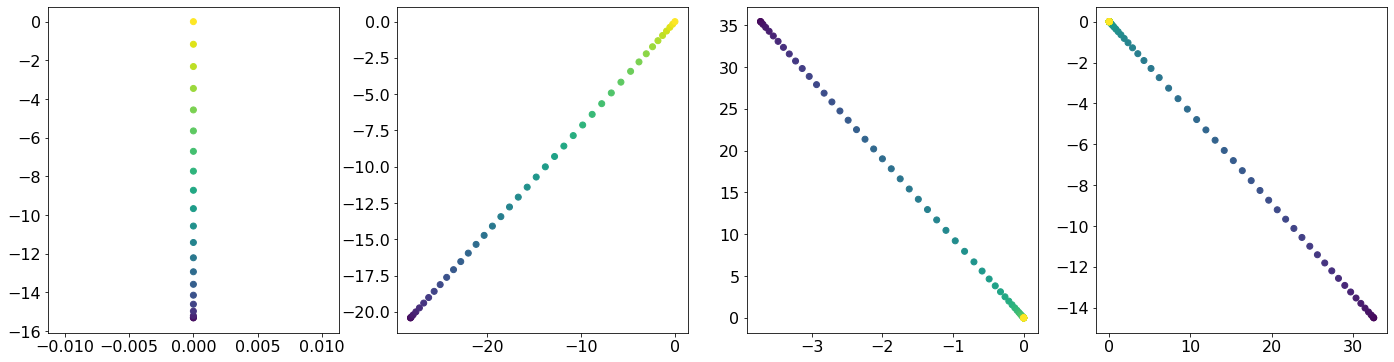

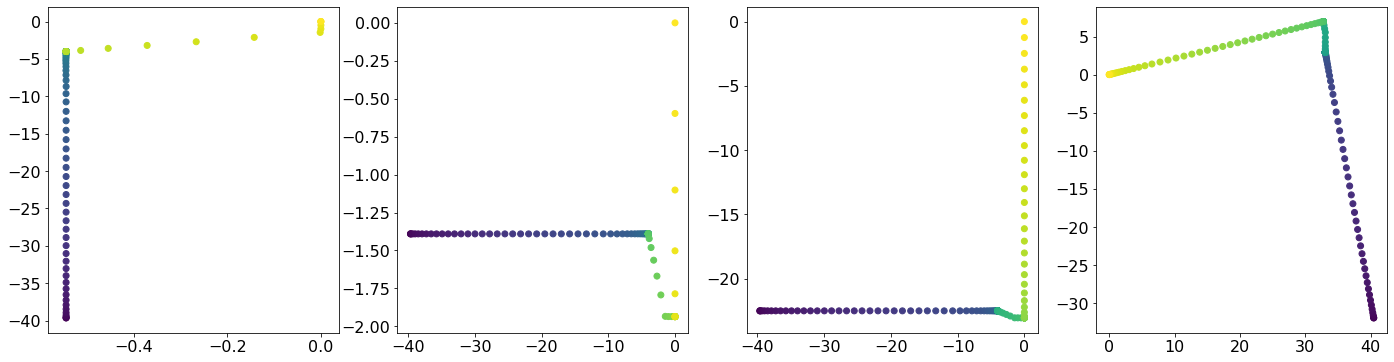

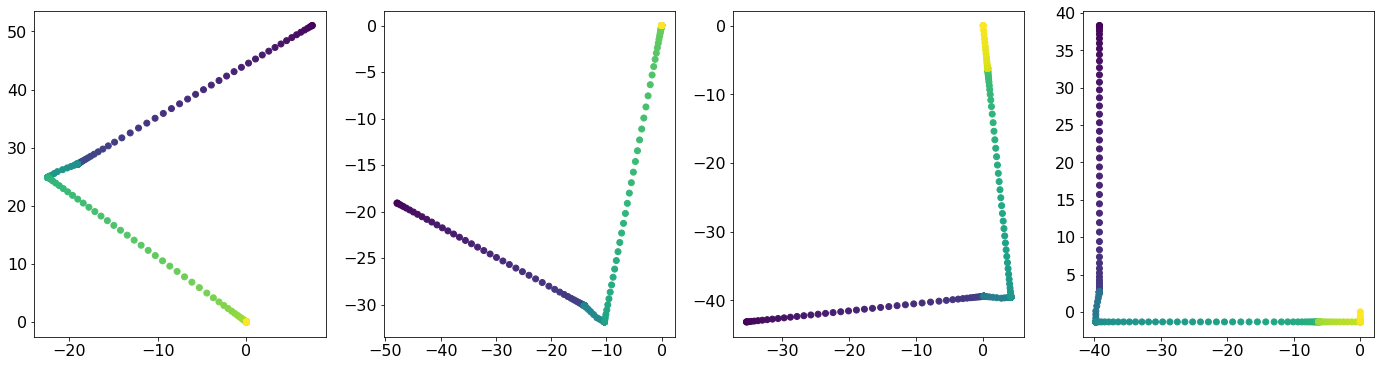

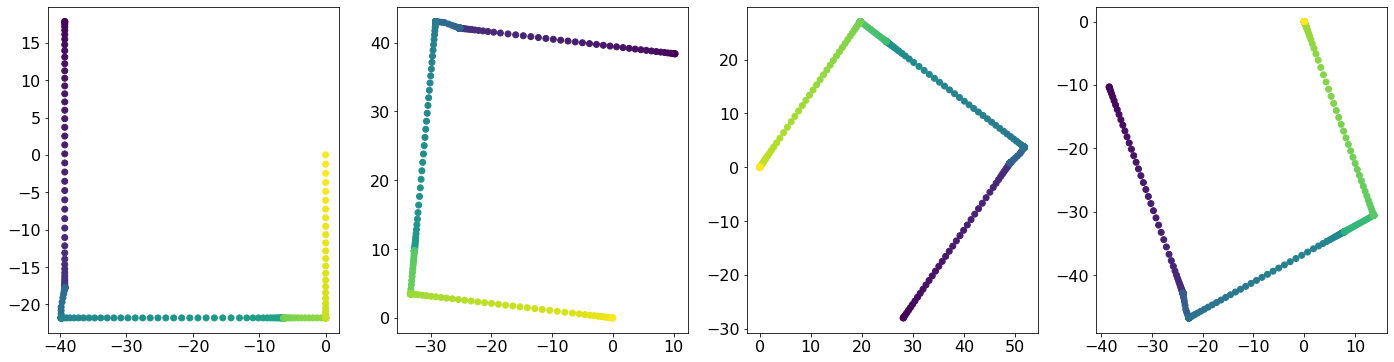

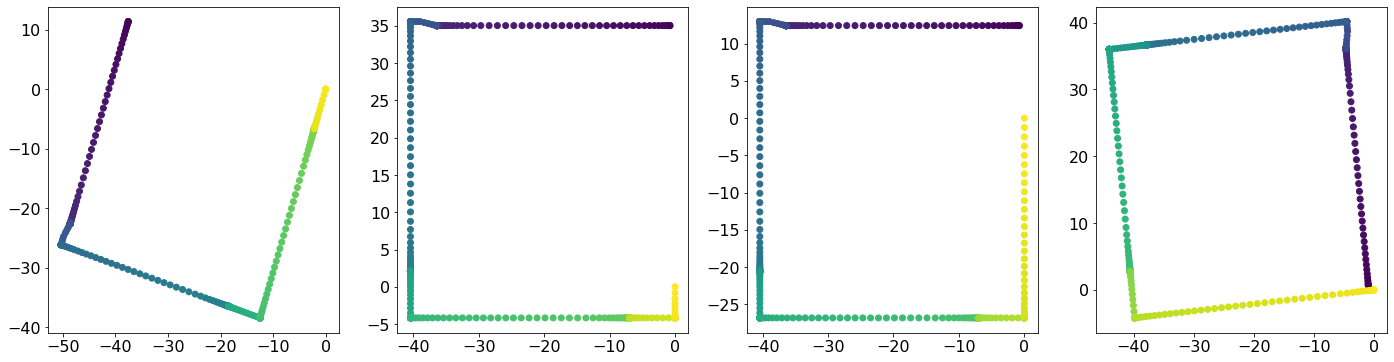

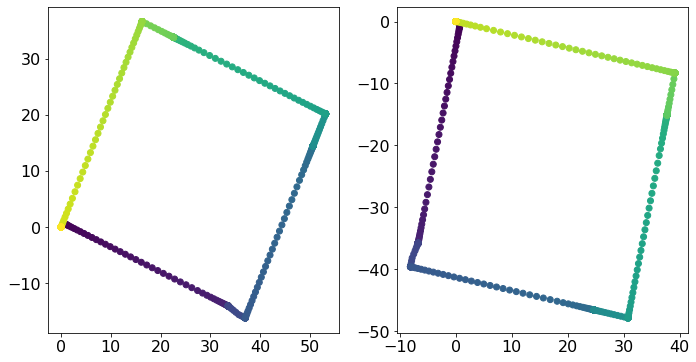

In [63]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00009.npz') # square, but doing rotations on each side

90


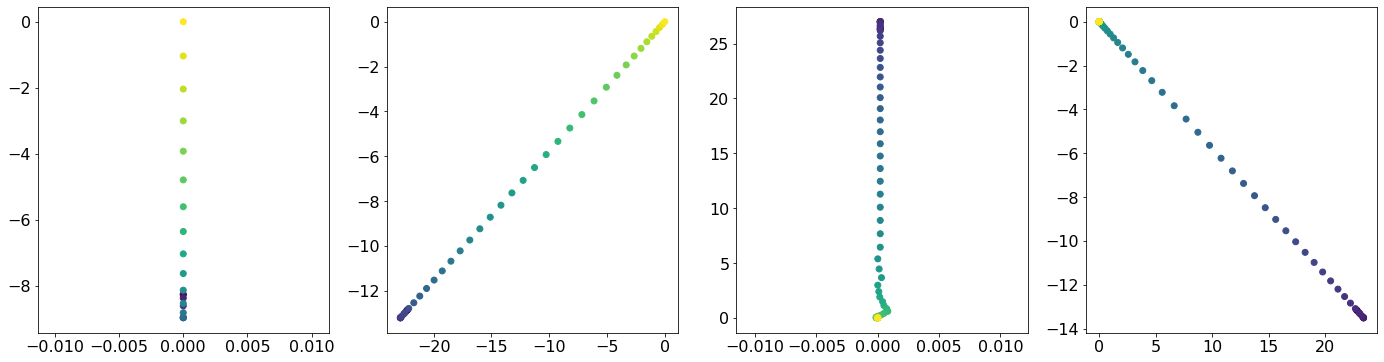

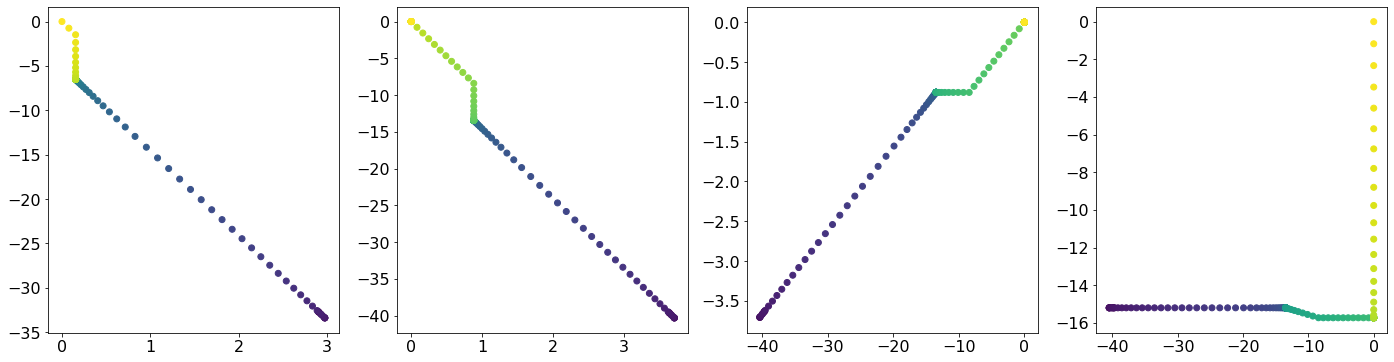

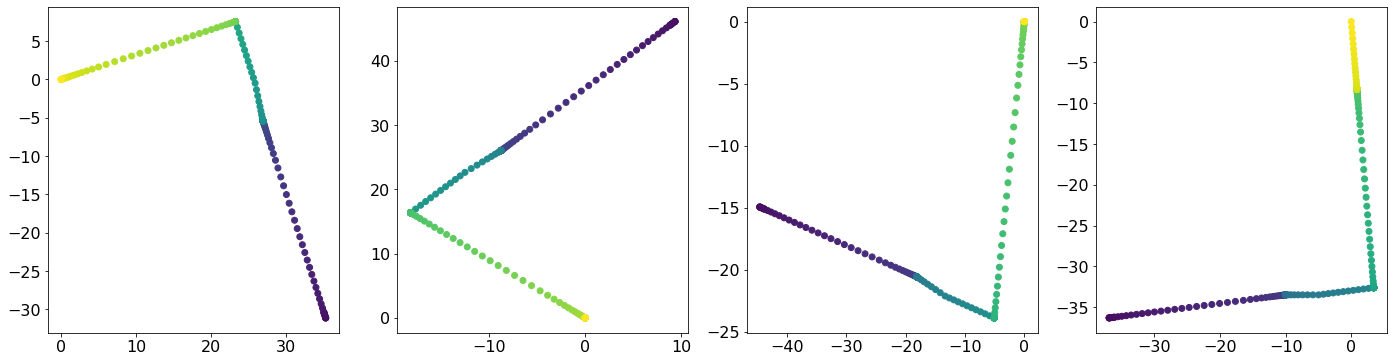

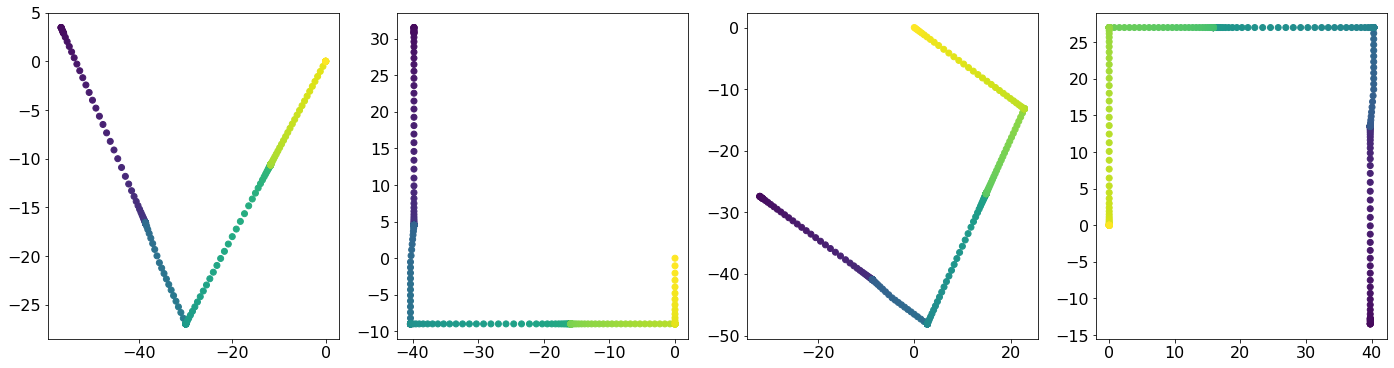

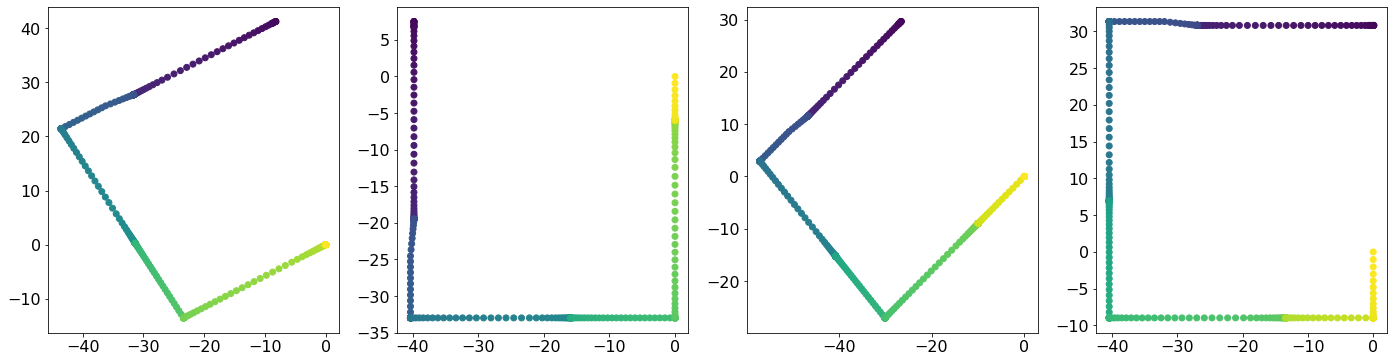

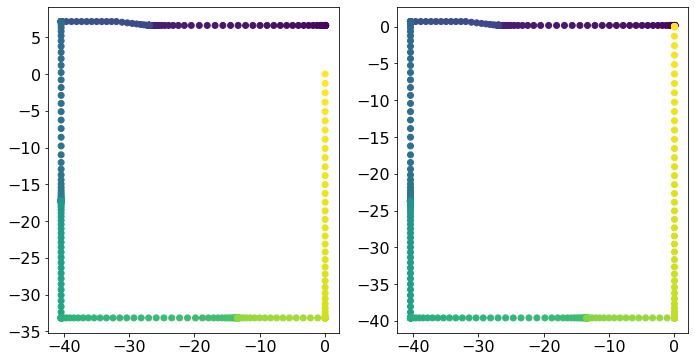

In [64]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00010.npz') # square, but doing rotations on each side

-360


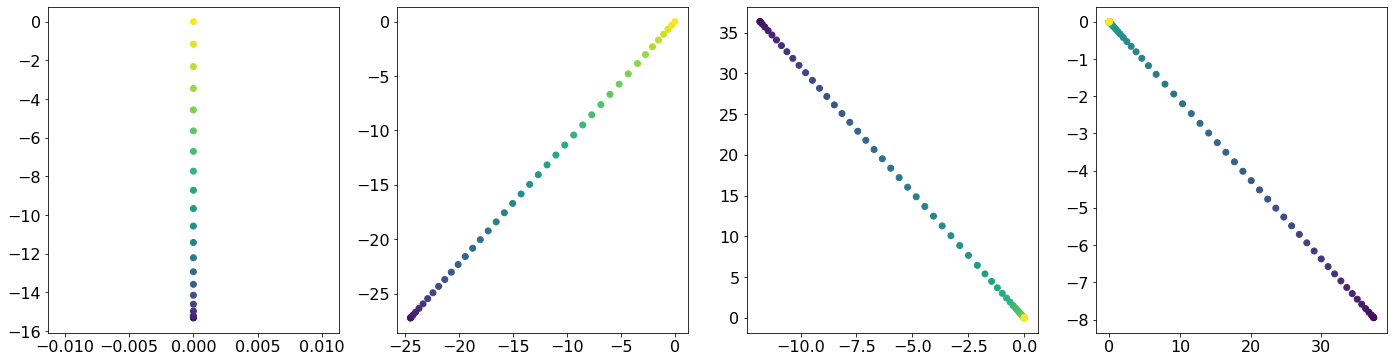

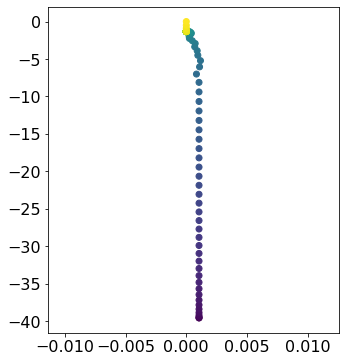

In [65]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00011.npz') # straight line with rotation att the end

-360


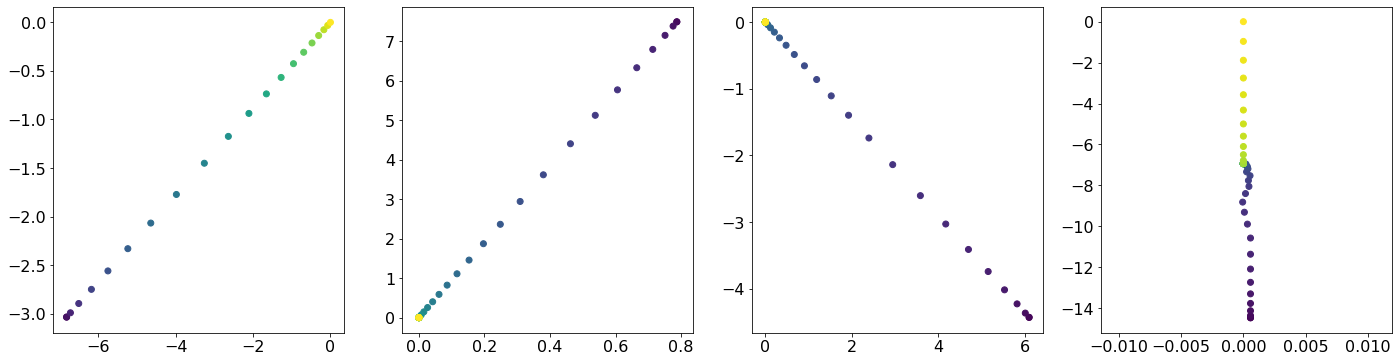

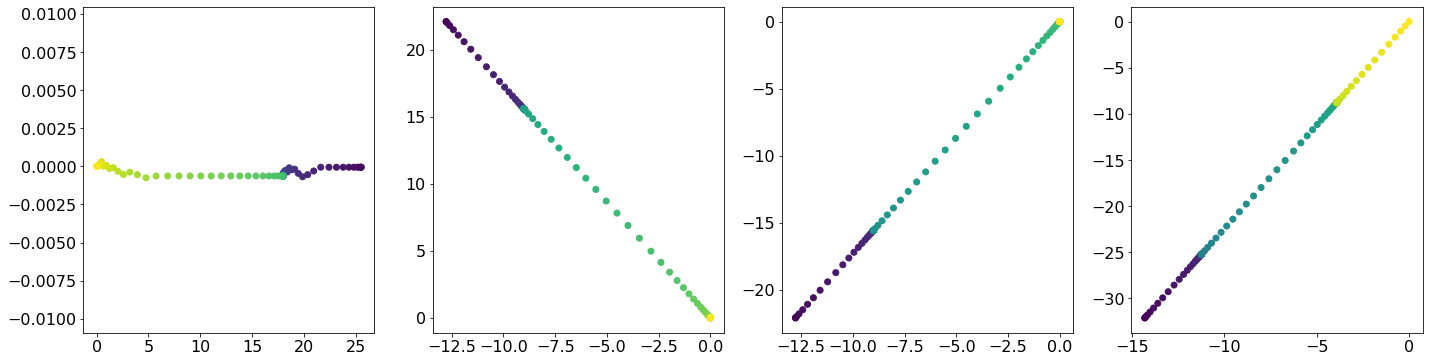

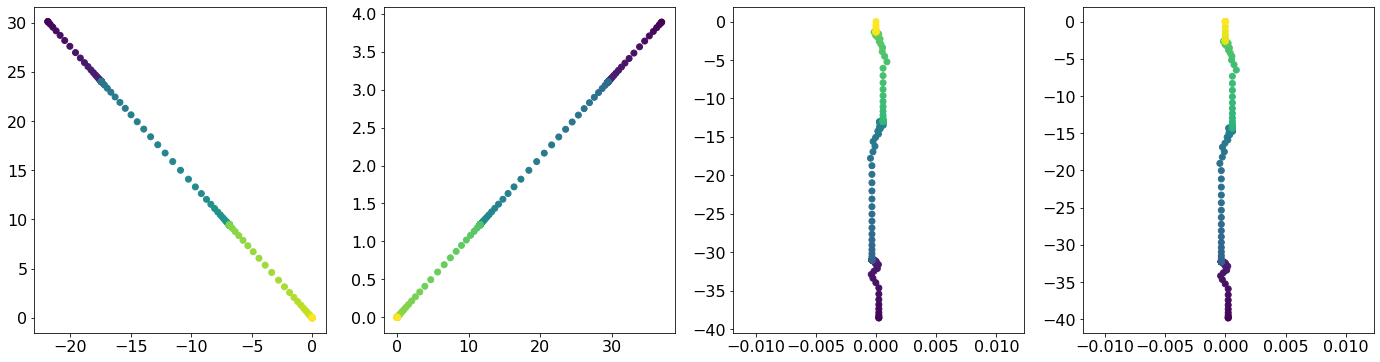

In [66]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00012.npz') # straight line with three rotations

1080


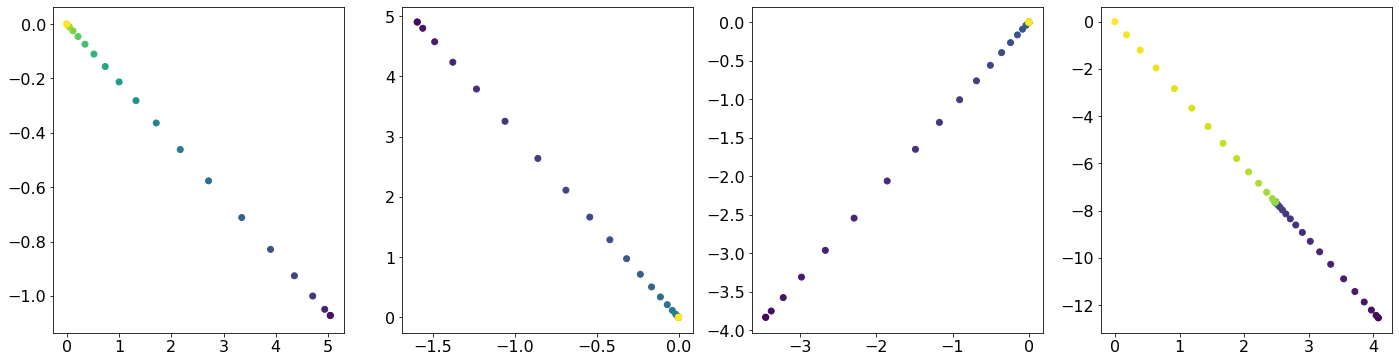

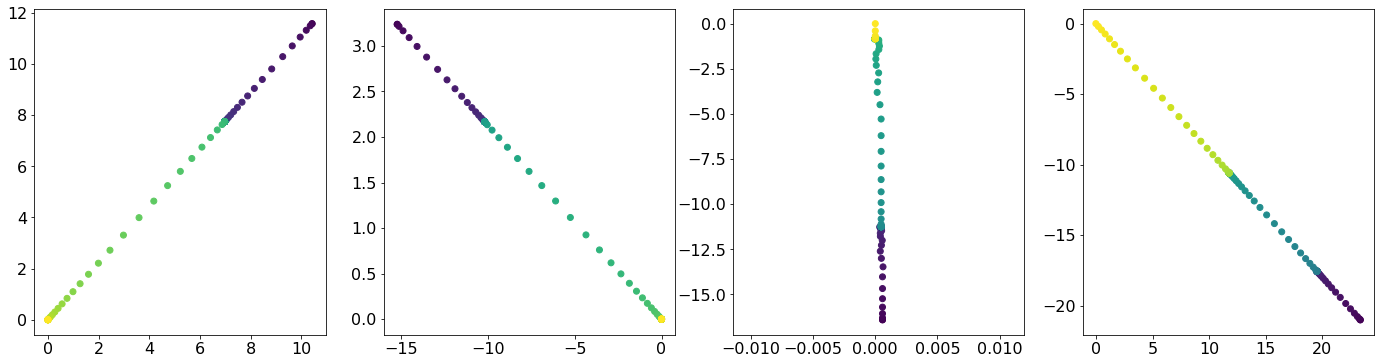

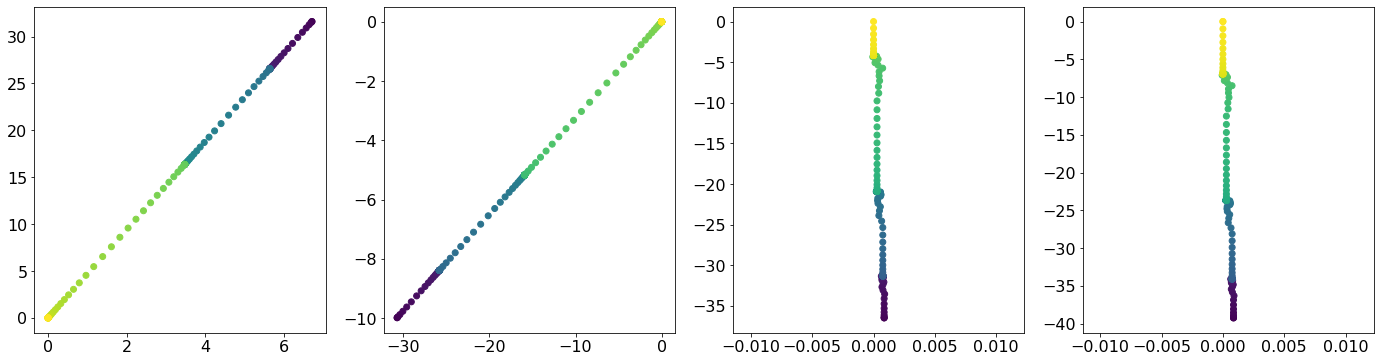

In [67]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00013.npz') # straight line with three rotations clockwise

-1080


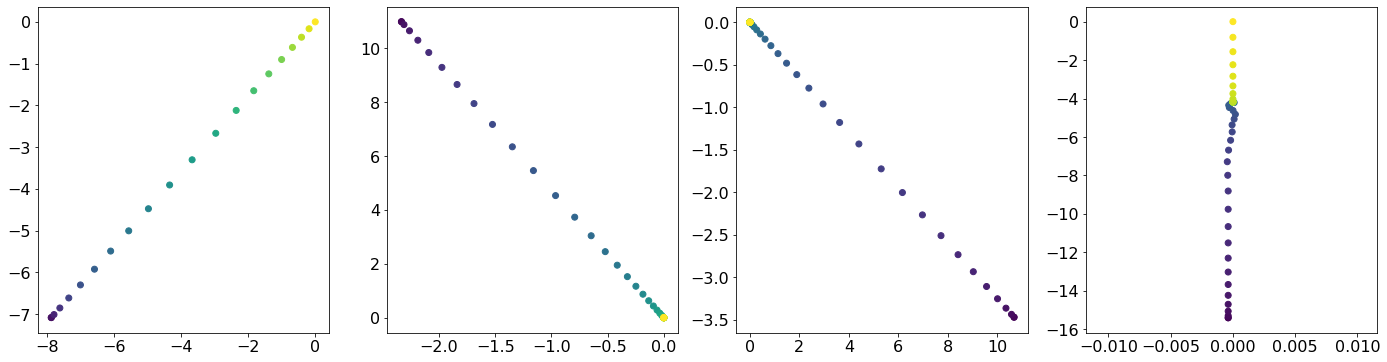

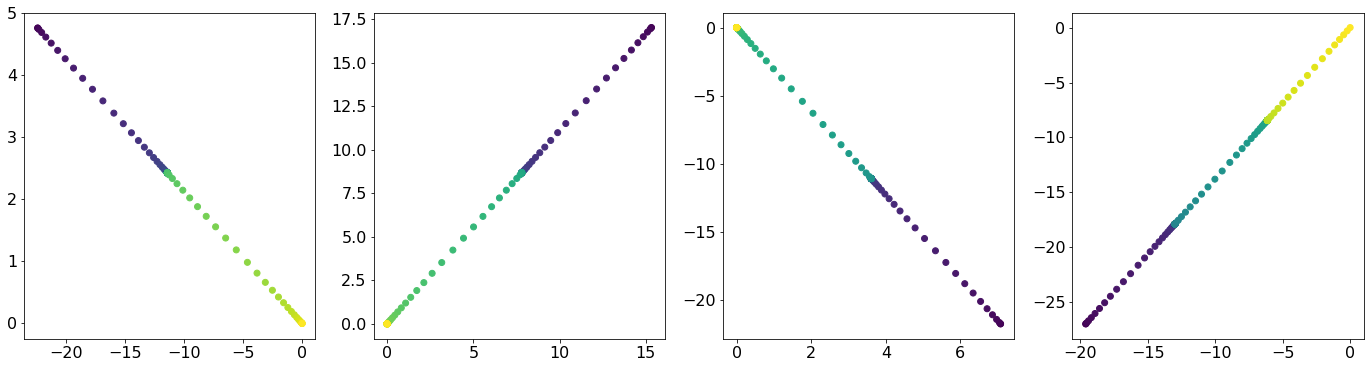

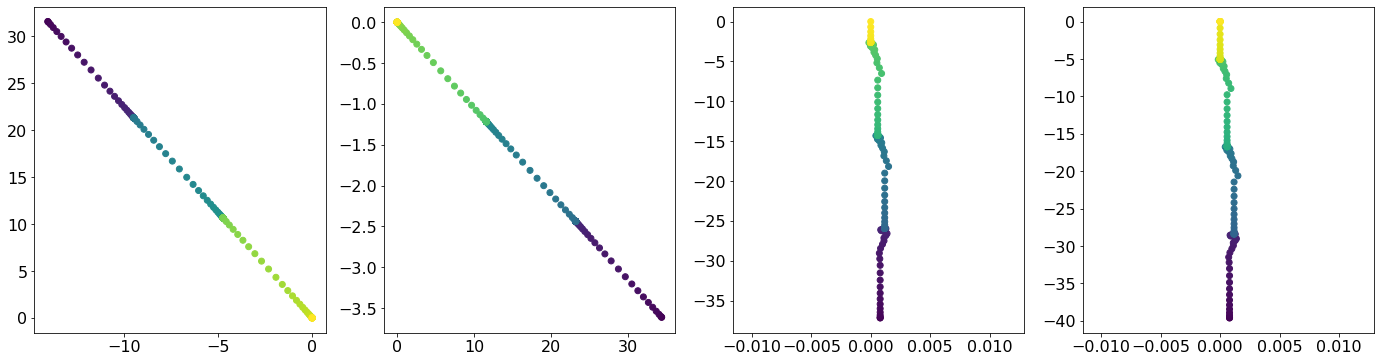

In [68]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00014.npz') # straight line with three rotations anti-clockwise